In [1]:
import pandas as pd
planes = pd.read_csv("planes.csv")
planes.head() 

Airline Date_of_Journey    Source Destination                  Route  \
0  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
1       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
2       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   
3     SpiceJet      24/06/2019   Kolkata    Banglore              CCU → BLR   
4  Jet Airways      12/03/2019  Banglore   New Delhi        BLR → BOM → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  \
0    09:25  04:25 10 Jun      19h     2 stops                      No info   
1    18:05         23:30   5h 25m      1 stop                      No info   
2    16:50         21:35   4h 45m      1 stop                      No info   
3    09:00         11:25   2h 25m    non-stop                      No info   
4    18:55  10:25 13 Mar  15h 30m      1 stop  In-flight meal not included   

     Price  
0  13882.0  
1   6218.0  
2  13302.0  
3   3873.0  
4  11087.0

In [2]:
print(planes["Destination"].value_counts())

Cochin       4391
Banglore     2773
Delhi        1219
New Delhi     888
Hyderabad     673
Kolkata       369
Name: Destination, dtype: int64


In [3]:
planes["Destination"].value_counts(normalize=True)

Cochin       0.425773
Banglore     0.268884
Delhi        0.118200
New Delhi    0.086105
Hyderabad    0.065257
Kolkata      0.035780
Name: Destination, dtype: float64

In [4]:
import pandas as pd
pd.crosstab(planes["Source"],planes["Destination"])

Destination  Banglore  Cochin  Delhi  Hyderabad  Kolkata  New Delhi
Source                                                             
Banglore            0       0   1199          0        0        868
Chennai             0       0      0          0      364          0
Delhi               0    4318      0          0        0          0
Kolkata          2720       0      0          0        0          0
Mumbai              0       0      0        662        0          0

In [5]:
pd.crosstab(planes["Source"],planes["Destination"],values=planes["Price"],aggfunc="median")

Destination  Banglore   Cochin   Delhi  Hyderabad  Kolkata  New Delhi
Source                                                               
Banglore          NaN      NaN  4823.0        NaN      NaN    10976.5
Chennai           NaN      NaN     NaN        NaN   3850.0        NaN
Delhi             NaN  10262.0     NaN        NaN      NaN        NaN
Kolkata        9345.0      NaN     NaN        NaN      NaN        NaN
Mumbai            NaN      NaN     NaN     3342.0      NaN        NaN

In [6]:
print(planes.dtypes)

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object


In [7]:
dateplanes = pd.read_csv("planes.csv", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
dateplanes.dtypes

C:\Users\informatics\AppData\Local\Temp\ipykernel_6048\4063335827.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dateplanes = pd.read_csv("planes.csv", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [8]:
print(planes["Duration"].value_counts())

2h 50m     532
1h 30m     375
2h 55m     329
2h 45m     329
2h 35m     322
          ... 
27h 55m      1
31h 30m      1
35h 35m      1
42h 5m       1
47h 40m      1
Name: Duration, Length: 367, dtype: int64


In [9]:
# แปลงเวลา 
planes["Duration"] = planes["Duration"].str.replace("h ", "")
planes["Duration"] = planes["Duration"].str.replace("h", "")
planes["Duration"] = planes["Duration"].str.replace("m", "")
planes["Duration"] = planes["Duration"].astype(float) 

In [10]:
print(planes["Duration"].value_counts())

250.0     532
130.0     375
255.0     343
245.0     333
235.0     333
         ... 
3255.0      1
3025.0      1
3625.0      1
2940.0      1
4740.0      1
Name: Duration, Length: 355, dtype: int64


In [11]:
planes.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration           float64
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [12]:
print(planes["Total_Stops"].value_counts())

1 stop      5503
non-stop    3411
2 stops     1488
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [13]:
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stops", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace(" stop", "")
planes["Total_Stops"] = planes["Total_Stops"].str.replace("non-stop", "0")
planes["Total_Stops"] = planes["Total_Stops"].astype(float)

In [14]:
print(planes["Total_Stops"].value_counts())

1.0    5503
0.0    3411
2.0    1488
3.0      45
4.0       1
Name: Total_Stops, dtype: int64


C:\Users\informatics\AppData\Local\Temp\ipykernel_6048\2017215314.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(planes.corr(), annot=True)


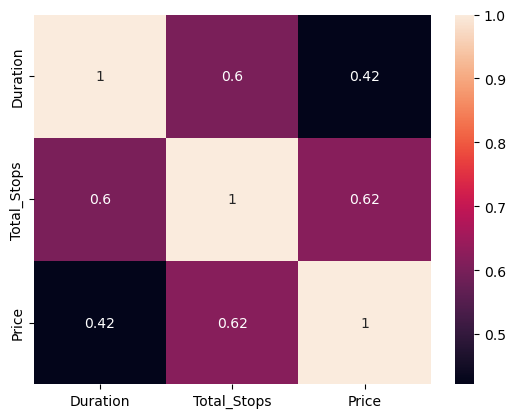

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(planes.corr(), annot=True)
plt.show()

In [16]:
dateplanes = pd.read_csv("planes.csv", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])
dateplanes.dtypes

C:\Users\informatics\AppData\Local\Temp\ipykernel_6048\4063335827.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dateplanes = pd.read_csv("planes.csv", parse_dates=["Date_of_Journey","Dep_Time","Arrival_Time"])


Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                     float64
dtype: object

In [17]:
planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"])
planes["month"] = planes["Date_of_Journey"].dt.month
planes["weekday"] = planes["Date_of_Journey"].dt.weekday
print(planes[["month", "weekday", "Date_of_Journey"]].head())


   month  weekday Date_of_Journey
0    9.0      4.0      2019-09-06
1   12.0      3.0      2019-12-05
2    1.0      3.0      2019-01-03
3    6.0      0.0      2019-06-24
4   12.0      1.0      2019-12-03


C:\Users\informatics\AppData\Local\Temp\ipykernel_6048\256231671.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  planes["Date_of_Journey"] = pd.to_datetime(planes["Date_of_Journey"])


In [18]:
# Convert "Dep_Time" and "Arrival_Time" columns to datetime format
planes["Dep_Time"] = pd.to_datetime(planes["Dep_Time"])
planes["Arrival_Time"] = pd.to_datetime(planes["Arrival_Time"])

# Extract the hour from the "Dep_Time" column
planes["Dep_Hour"] = planes["Dep_Time"].dt.hour

# Extract the hour from the "Arrival_Time" column
planes["Arrival_hour"] = planes["Arrival_Time"].dt.hour

# Print the selected columns for the first few rows
print(planes[["Dep_Hour", "Arrival_hour", "Dep_Time", "Arrival_Time"]].head())


   Dep_Hour  Arrival_hour            Dep_Time        Arrival_Time
0       9.0           4.0 2024-02-05 09:25:00 2024-06-10 04:25:00
1      18.0          23.0 2024-02-05 18:05:00 2024-02-05 23:30:00
2      16.0          21.0 2024-02-05 16:50:00 2024-02-05 21:35:00
3       9.0          11.0 2024-02-05 09:00:00 2024-02-05 11:25:00
4      18.0          10.0 2024-02-05 18:55:00 2024-03-13 10:25:00


C:\Users\informatics\AppData\Local\Temp\ipykernel_6048\2017215314.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(planes.corr(), annot=True)


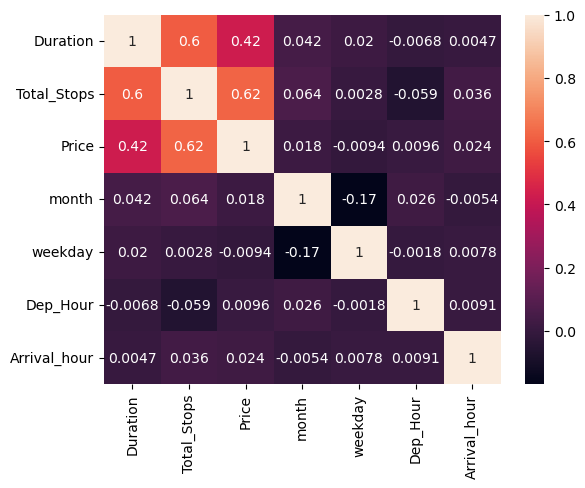

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(planes.corr(), annot=True)
plt.show()

In [20]:
print(planes["Price"].describe())

count    10044.000000
mean      9044.411191
std       4472.304869
min       1759.000000
25%       5276.750000
50%       8366.000000
75%      12373.000000
max      54826.000000
Name: Price, dtype: float64


In [21]:
twenty_fifth = planes["Price"].quantile(0.25)
median = planes["Price"].median()
seventy_fifth = planes["Price"].quantile(0.75)  
maximum = planes["Price"].max()

In [22]:
labels = ["Economy","Premium Economy","Bussiness Class","Frist Class"]
bins = [0,twenty_fifth,median,seventy_fifth,maximum]

In [23]:
planes["Price_Category"] = pd.cut(planes["Price"],
                                 labels=labels,
                                 bins=bins)
print(planes[["Price","Price_Category"]])

         Price   Price_Category
0      13882.0      Frist Class
1       6218.0  Premium Economy
2      13302.0      Frist Class
3       3873.0          Economy
4      11087.0  Bussiness Class
...        ...              ...
10655   4107.0          Economy
10656   4145.0          Economy
10657   7229.0  Premium Economy
10658  12648.0      Frist Class
10659  11753.0  Bussiness Class

[10660 rows x 2 columns]


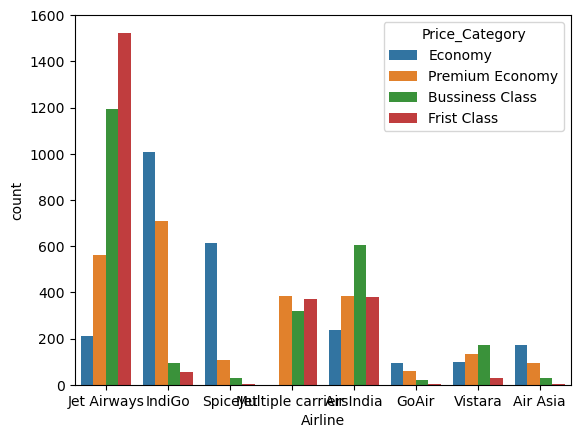

In [24]:
sns.countplot(data=planes,x="Airline",hue="Price_Category")
plt.show()